In [1]:
from utils import create_df, calculate_endpoint_variance
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
markers = {"no_bonus": "+", "hit_bonus": "o"}
variations = ["6_buttons", "force_constraint", "mixed_button_positions"]
variant_names = ["Default", "6Button", "Force", "Randmap"]
fontsize = 15
all_variants = ["default"] + variations
cmap = plt.get_cmap('plasma') 
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / (len(all_variants))) for key, v in zip(all_variants, values)}
plt.rcParams.update({'font.size': fontsize})

In [3]:
#read data
folder = os.path.abspath(f"../../simulators/")
sparse_df = {}
sparse_df["default"], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "choice_reaction")

for v in variations:
    sparse_df[v], _ = create_df(["hit_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "choice_reaction", variation=v)

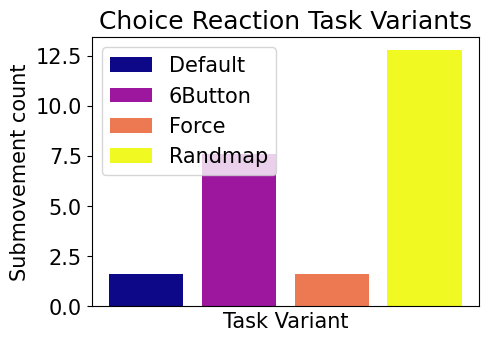

In [4]:
fig, ax = plt.subplots(figsize=(5, 3.5))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['submovements_count'], label=variant_names[i], color=colors[all_variants[i]])

plt.title("Choice Reaction Task Variants")
plt.legend(loc="upper left")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Submovement count", fontsize=fontsize)
plt.savefig("Nr_of_submovements/number_of_submovements_choice_reaction_variants", bbox_inches='tight')

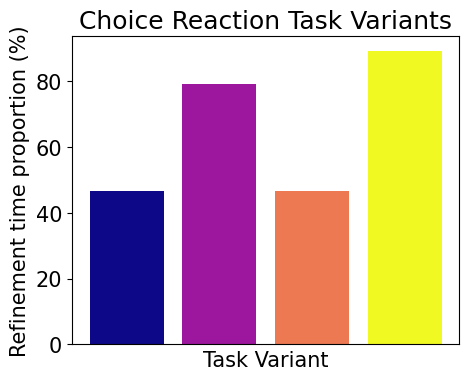

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(len(all_variants)):
    ax.bar(i, sparse_df[all_variants[i]]['RTP'].mean()*100, label=all_variants[i], color=colors[all_variants[i]])

plt.title("Choice Reaction Task Variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Refinement time proportion (%)", fontsize=fontsize)
plt.savefig("RTP/RTP_choice_reaction_variants", bbox_inches='tight')

In [6]:
endpoint_variance_df = {}
endpoint_variance_df["default"] = calculate_endpoint_variance(["hit_bonus"], ["zero_effort"], ["dist"], folder, task = "choice_reaction")
for v in variations:
    endpoint_variance_df[v] = calculate_endpoint_variance(["hit_bonus"], ["zero_effort"], ["dist"], folder, task = "choice_reaction", variation=v)

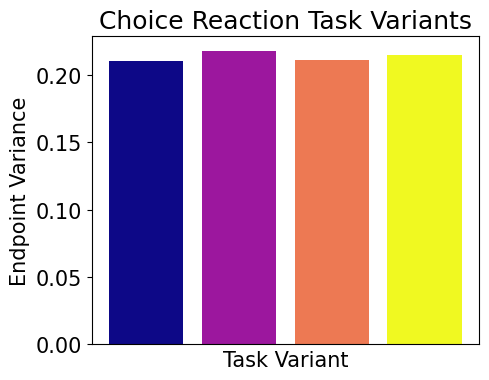

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(len(all_variants)):
    ax.bar(i, endpoint_variance_df[all_variants[i]]['endpoint_variance'].mean(), label=all_variants[i], color=colors[all_variants[i]])

plt.title("Choice Reaction Task Variants")
plt.yticks(fontsize=fontsize)
plt.xticks([])
plt.xlabel("Task Variant", fontsize=fontsize)
plt.ylabel("Endpoint Variance", fontsize=fontsize)
plt.savefig("endpoint_variance/endpoint_variance_choice_reaction_variants", bbox_inches='tight')